In [8]:
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [9]:
model = models.load_model("../Models/mark2.h5")
testing_dir = "../ImagesForFlow2/test/"
height = 256
width = 256
batch_size = 50

In [10]:
testing_datagen = ImageDataGenerator(rescale=1./255)
testing_generator = testing_datagen.flow_from_directory(
        testing_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = testing_generator.filenames
 
# Get the ground truth from generator
ground_truth = testing_generator.classes
 
# Get the label to class mapping from the generator
label2index = testing_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(testing_generator, 
                                      steps=testing_generator.samples/testing_generator.batch_size,
                                      verbose=1)
predicted_classes = np.argmax(predictions,axis=1) #Entrega el indice, no la etiqueta

Found 13671 images belonging to 1714 classes.
274/273 [==============================] - 99s 360ms/step


In [11]:
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors), testing_generator.samples))

No of errors = 1868/13671


In [12]:
%matplotlib inline
from skimage import io
from os.path import join
from scipy.io import loadmat
data = loadmat("../CompCars/data/misc/make_model_name.mat")

Prediction: 1
Original label: 1
Predicted make and model: ['Audi A4L']
Original make and model: ['Audi A4L']
100/0af9d24865feaa.jpg


/home/sagacius/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/sagacius/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


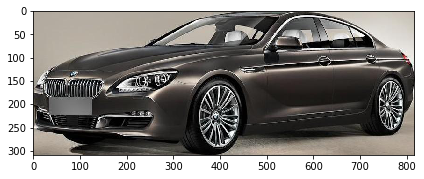

In [17]:
j = 0
for pred in predicted_classes:
    if pred == 0:
        j = j +1
        continue
    if pred == ground_truth[j]:
        print("Prediction: " + str(pred))
        print("Original label: " + str(ground_truth[j]))
        print("Predicted make and model: " + str(data["model_names"][pred][0]))
        print("Original make and model: " + str(data["model_names"][ground_truth[j]][0]))
        print(fnames[j])
        im = io.imread(join("../ImagesForFlow2/test/", fnames[j]))
        io.imshow(im);
        break
    j = j +1